In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Reading the Data 

In [6]:
data=pd.read_excel('Linear Regression.xlsx')

In [7]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [8]:
data.tail()

,price,sqft_living,bedrooms,bathrooms,floors
21608,360000,1530,3,2.50,3.0
21609,400000,2310,4,2.50,2.0
21610,402101,1020,2,0.75,2.0
21611,400000,1600,3,2.50,2.0
21612,325000,1020,2,0.75,2.0


In [9]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [11]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [13]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


# Price vs Square Feet

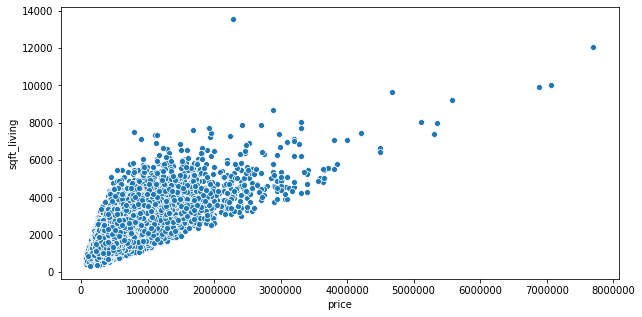

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['price'],data['sqft_living'])

In [42]:
X = data.iloc[:,:1]
X.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [44]:
Y1 = data.iloc[:,1:2]
Y1.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [45]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X,Y1,test_size = 0.2,random_state = 2)

In [46]:
data.shape

(21613, 5)

In [47]:
X_train.shape

(17290, 1)

In [48]:
X_test.shape

(4323, 1)

In [49]:
Y1_train.shape

(17290, 1)

In [50]:
Y1_test.shape

(4323, 1)

In [51]:
lin_reg=LinearRegression()

In [52]:
lin_reg.fit(X_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lin_reg.coef_

array([[0.00174633]])

In [54]:
lin_reg.intercept_

array([1131.43277126])

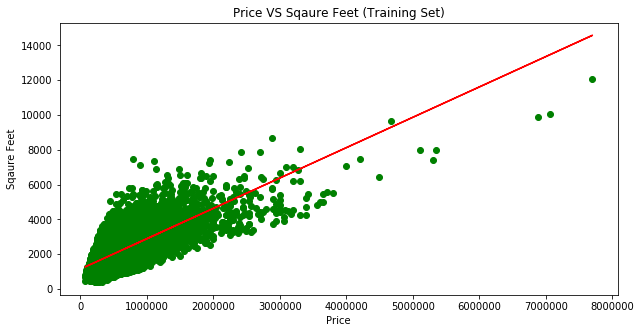

In [58]:
#Visualise Training set result
plt.figure(figsize=(10,5))
plt.scatter(X_train, Y1_train, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')
plt.title('Price VS Sqaure Feet (Training Set)')
plt.xlabel('Price')
plt.ylabel('Sqaure Feet')
plt.show()

In [57]:
Y1pred=lin_reg.predict(X_test)
Y1pred

array([[2414.98599378],
       [3139.71332351],
       [1743.52175697],
       ...,
       [1825.51199343],
       [1786.30686438],
       [1494.66960158]])

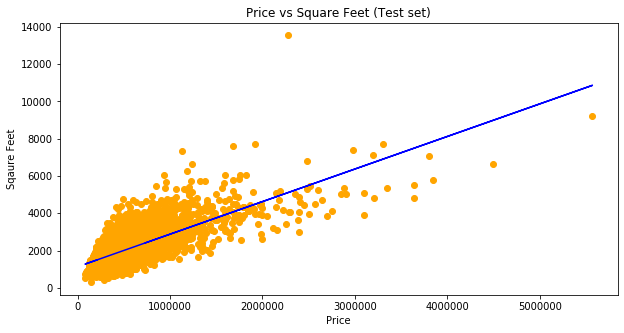

In [61]:
# Visualise Test set result
plt.figure(figsize=(10,5))
plt.scatter(X_test, Y1_test, color = 'orange')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.title('Price vs Square Feet (Test set)')
plt.xlabel('Price')
plt.ylabel('Sqaure Feet')
plt.show()

In [62]:
RMSE=np.sqrt(mean_squared_error(Y1_test,Y1pred))
r_square=r2_score(Y1_test,Y1pred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.5022021804710803
The RMSE value is........ 666.5368304302992


# Price vs Bedrooms

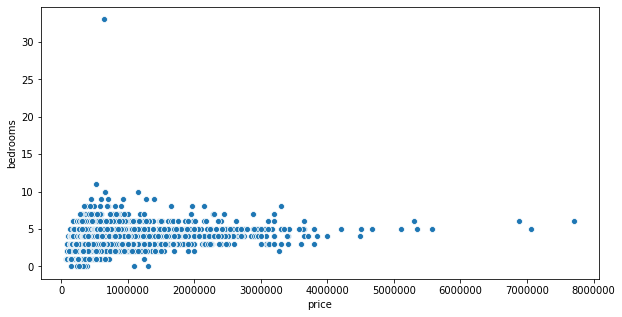

In [83]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['price'],data['bedrooms'])

In [84]:
Y2 = data.iloc[:,2:3]
Y2.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [85]:
data.shape 

(21613, 5)

In [86]:
X_train.shape 

(17290, 1)

In [87]:
X_test.shape 

(4323, 1)

In [88]:
Y2_train.shape 

(17290, 1)

In [89]:
Y2_test.shape 

(4323, 1)

In [90]:
lin_reg.fit(X_train,Y2_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
lin_reg.coef_ 

array([[7.70125623e-07]])

In [92]:
lin_reg.intercept_ 

array([2.95061418])

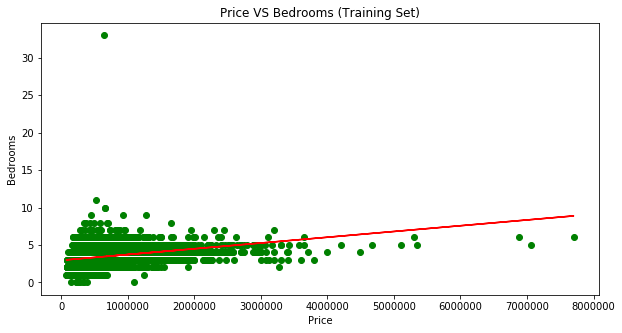

In [94]:
#Visualise Training set result
plt.figure(figsize=(10,5))
plt.scatter(X_train, Y2_train, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')
plt.title('Price VS Bedrooms (Training Set)')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show() 

In [95]:
Y2pred=lin_reg.predict(X_test)
Y2pred 

array([[3.51665652],
       [3.83625865],
       [3.22054321],
       ...,
       [3.25670061],
       [3.23941129],
       [3.11080031]])

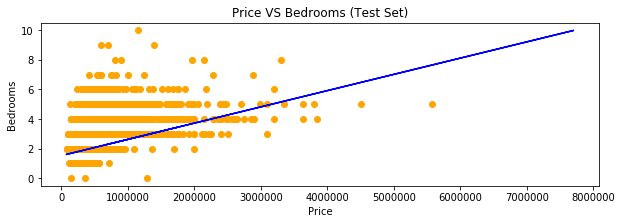

In [116]:
#Visualise Test set result
plt.figure(figsize=(10,3))
plt.scatter(X_test, Y2_test, color = 'orange')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Price VS Bedrooms (Test Set)')
plt.xlabel('Price')
plt.ylabel('Bedrooms')
plt.show() 

In [98]:
RMSE=np.sqrt(mean_squared_error(Y2_test,Y2pred))
r_square=r2_score(Y2_test,Y2pred) 
print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE) 

The R-Square value is... 0.10933217805863649
The RMSE value is........ 0.8736548931683022


# Price vs Bathrooms

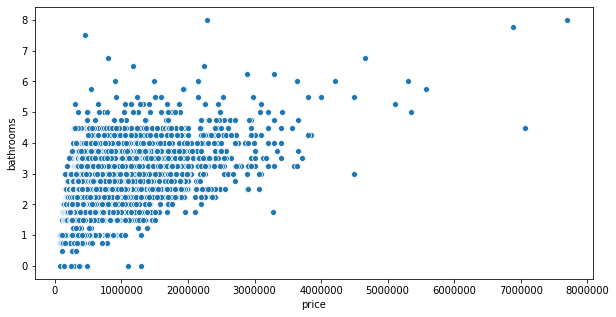

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['price'],data['bathrooms'])

In [99]:
Y3 = data.iloc[:,3:4]
Y3.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [100]:
X_train, X_test, Y3_train, Y3_test = train_test_split(X,Y3,test_size = 0.2,random_state = 2)

In [101]:
data.shape

(21613, 5)

In [102]:
X_train.shape

(17290, 1)

In [103]:
X_test.shape

(4323, 1)

In [104]:
Y3_train.shape

(17290, 1)

In [105]:
Y3_test.shape

(4323, 1)

In [106]:
lin_reg.fit(X_train,Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
lin_reg.coef_

array([[1.10105199e-06]])

In [108]:
lin_reg.intercept_

array([1.5185242])

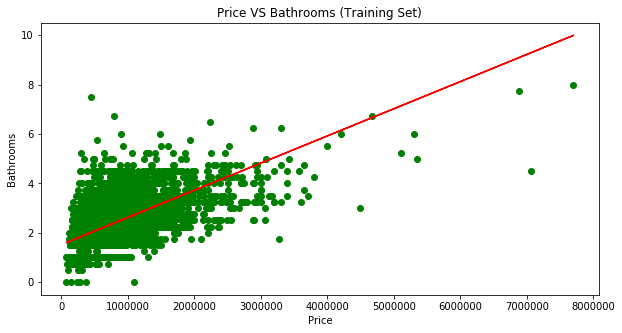

In [110]:
#Visualise Training set result
plt.figure(figsize=(10,5))
plt.scatter(X_train, Y3_train, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')
plt.title('Price VS Bathrooms (Training Set)')
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.show() 

In [111]:
Y3pred=lin_reg.predict(X_test)
Y3pred 

array([[2.32779742],
       [2.78473399],
       [1.90444293],
       ...,
       [1.95613732],
       [1.9314187 ],
       [1.74754302]])

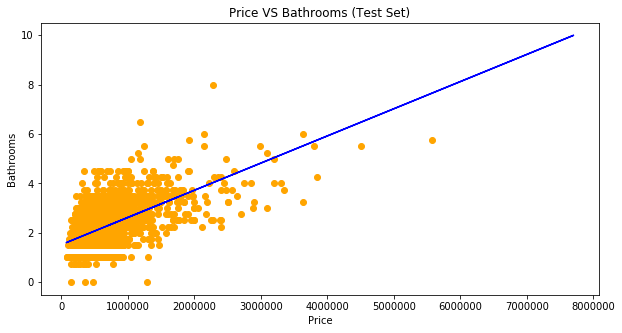

In [114]:
#Visualise Test set result
plt.figure(figsize=(10,5))
plt.scatter(X_test, Y3_test, color = 'orange')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Price VS Bathrooms (Test Set)')
plt.xlabel('Price')
plt.ylabel('Bathrooms')
plt.show() 

In [117]:
RMSE=np.sqrt(mean_squared_error(Y3_test,Y3pred))
r_square=r2_score(Y3_test,Y3pred) 
print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE) 

The R-Square value is... 0.28127401846250877
The RMSE value is........ 0.6591011174526225


# Price vs Floors

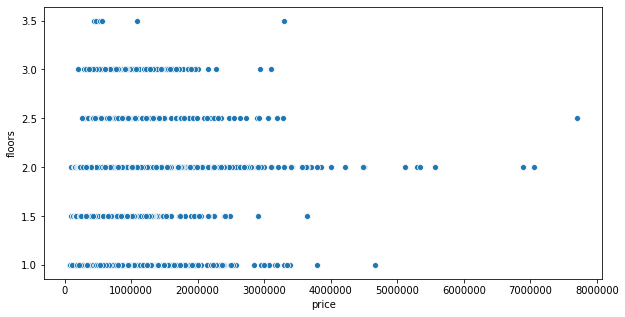

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data['price'],data['floors'])

In [118]:
Y4 = data.iloc[:,4:]
Y4.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [119]:
X_train, X_test, Y4_train, Y4_test = train_test_split(X,Y4,test_size = 0.2,random_state = 2)

In [120]:
data.shape

(21613, 5)

In [121]:
X_train.shape

(17290, 1)

In [122]:
X_test.shape

(4323, 1)

In [123]:
Y4_train.shape

(17290, 1)

In [124]:
Y4_test.shape

(4323, 1)

In [125]:
lin_reg.fit(X_train,Y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
lin_reg.coef_

array([[3.73194413e-07]])

In [127]:
lin_reg.intercept_

array([1.29281316])

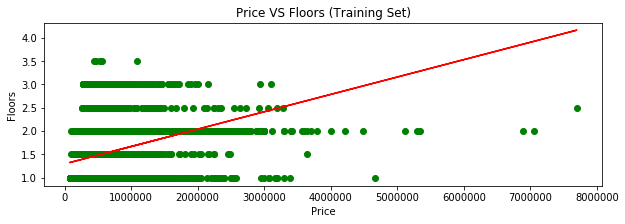

In [129]:
#Visualise Training set result
plt.figure(figsize=(10,3))
plt.scatter(X_train, Y4_train, color = 'green')
plt.plot(X_train, lin_reg.predict(X_train), color = 'red')
plt.title('Price VS Floors (Training Set)')
plt.xlabel('Price')
plt.ylabel('Floors')
plt.show() 

In [130]:
Y4pred=lin_reg.predict(X_test)
Y4pred 

array([[1.56711105],
       [1.72198673],
       [1.4236178 ],
       ...,
       [1.44113928],
       [1.43276106],
       [1.3704376 ]])

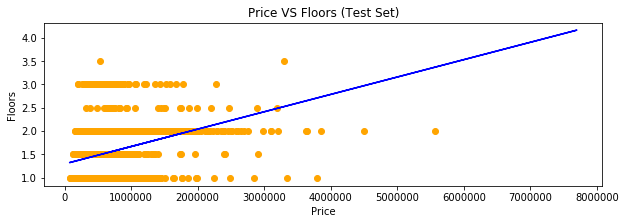

In [132]:
#Visualise Test set result
plt.figure(figsize=(10,3))
plt.scatter(X_test, Y4_test, color = 'orange')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Price VS Floors (Test Set)')
plt.xlabel('Price')
plt.ylabel('Floors')
plt.show() 

In [133]:
RMSE=np.sqrt(mean_squared_error(Y4_test,Y4pred))
r_square=r2_score(Y4_test,Y4pred) 
print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE) 

The R-Square value is... 0.07374135097127821
The RMSE value is........ 0.5222402255396246


From the above tests we can conclude that the price of the flat is more dependent on the __sqaure feet__ than number of bathrooms, bedrooms and floors.